# Introducción

En este notebook aprenderemos los conceptos básicos sobre Tensorflow y Keras (dos de los frameworks más conocidos y extendidos en Deep Learning).

Para entender la diferencia entre ambos podemos decir que Keras se ejecuta sobre Tensorflow simplificando el desarrollo y el código.

En otras palabras, Keras se considera una API de más alto nivel que Tensorflow.

De hecho, desde Tensorflow 2.x, Keras viene ya integrado y no se hace uso de sintaxis propia de Tensorflow (que es más tediosa)

En definitiva, para Deep Learning y Computer Vision, Keras y Tensorflow "es lo mismo".


# Keras

Vamos a ver en esta sección un mínimo sobre la sintaxis más común de Keras.



In [ ]:
from keras import datasets, layers, models, losses
import matplotlib.pyplot as plt

Lo primero de todo, vamos a cargar un conjunto de datos de los que ya vienen pre-establecidos en Keras: CIFAR10

Esta base de datos tiene 10 categorías diferentes, con 6k imágenes por cada clase. Cada imágen tiene un tamaño de 32x32 píxeles.

In [ ]:
#  Cargamos y dividimos el conjunto de datos en train y test
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Visualizamos ahora una de las imágenes para ver el aspecto que tiene. Pero antes de eso, veremos qué aspecto tiene un "tensor".

In [ ]:
train_images.shape

(50000, 32, 32, 3)

Como vemos, `train_images` es un conjunto de matrices de (32, 32, 3). Reconocemos que estas matrices de (32, 32, 3) son imágenes de 32x32 píxeles y que poseen 3 capas (asumimos que esas capas son RGB)

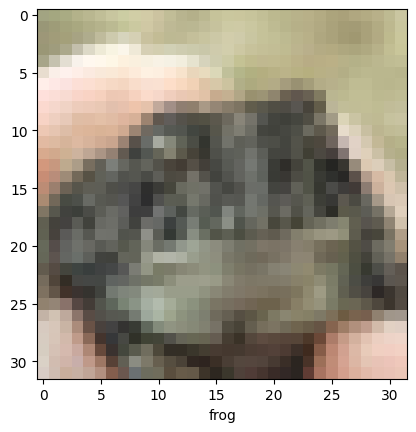

In [ ]:
# Utilizaremos el siguiente parámetro para acceder a una imagen en concreto
# En general, usamos mayúsculas para indicar que una variable NUNCA se sobreescribirá
# en este código
NUM_IMAGEN = 25

plt.imshow(train_images[NUM_IMAGEN] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[NUM_IMAGEN][0]])
plt.show()

Hasta aquí, no hemos visto nada especial de Keras. Sólo hemos hecho uso de los datos que vienen por defecto.

Vamos a empezar a crear una primera red neuronal desde cero.

Para ello, hacemos uso de `Sequential()` que es la manera en la cual Keras/Tensorflow denominan a las redes neuronales que conocemos (en el fondo son Secuenciales, porque primero se ejecuta una capa, luego otra, luego otra, etc...)

In [ ]:
model = models.Sequential()

Antes de que os preguntéis qué otras alternativas hay aparte de `Sequential()`, que las veremos más adelante, veamos qué contiene esta variable `model`

In [ ]:
model

En este caso `model` está completamente vacío. La única información que contiene es que es una tipo de arquitectura de red neuronal `Sequential()`.

Para que la red neuronal sea algo útil, necesita capas (layers). Vamos ahora a añadirle una capa convolucional, que tenga 32 filtros de 3x3 y una activación `relu`.

In [ ]:
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu',
                        input_shape=(32, 32, 3)))

Para crear el paso anterior hemos hecho uso de:
- Una capa llamada `Conv2` que es la convolución en dos dimensiones como hemos visto en clase
- El parámetro 32 (que no ha de confundirse con ninguno de los 32x32 del tamaño de la imagen)
- El parámetro (3,3) que es el tamaño del kernel
- La función de activación: `ReLU`
 de Rectified Linear Unit

Vamos a ver ahora qué arquitectura/estructura tiene esta red neuronal:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Vemos que hay una sola capa (`conv2d`) que proporciona una salida de la forma (None, 30,30,32) con un total de 896 parámetros. ¿De dónde salen esos 896 parámetros?

De lo siguiente:
- Los kernels son de 3x3, luego cada celda del kernel será un parámetro. Por lo tanto, 9.
- El número de capas de entrada (también llamado canales) es 3
- El número de capas de salida (también llamado canales) es 32
- La fórmula que los relaciona es: `Parámetros=3×3×(3 canales entrada) x(32 canales salida)=864`

A esto hay que sumarle, 32 sesgos adicionales (un sesgo por cada canal de salida)

¿Por qué un sesgo adicional? Porque como vimos el año pasado, en una red neuronal tenemos los pesos ($w_i$) + un elemento de bias (`b`), sesgo.

Por otro lado, ¿por qué la salida es (None, 30, 30, 32)? ¿De dónde ha salido el 30? Efecto debido a la ausencia de Padding (ver `padding:valid` luego)

![Texto Alternativo](https://d2l.ai/_images/conv-pad.svg)


Sigamos analizando la capa más en detalle.
¿Qué valores tendrá esta capa? ¿Serán valores nulos?

In [ ]:
model.get_layer('conv2d').get_config()

{'name': 'conv2d',
 'trainable': True,
 'dtype': 'float32',
 'batch_input_shape': (None, 32, 32, 3),
 'filters': 32,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [ ]:
model.get_layer('conv2d').get_weights()

[array([[[[ 8.62790197e-02,  4.75972891e-03,  6.06867522e-02,
            4.38393205e-02, -1.02654569e-01,  2.15198249e-02,
            3.99564058e-02, -1.58698633e-02, -1.10031873e-01,
           -8.74308199e-02,  4.64647710e-02,  2.01013386e-02,
            1.24992773e-01,  7.85386562e-03, -9.88467485e-02,
            1.11821830e-01,  1.25821188e-01,  3.60760391e-02,
           -1.05600938e-01,  5.55275232e-02,  2.92342901e-03,
           -1.29241794e-02,  2.08917111e-02,  1.19214058e-02,
            1.69414729e-02, -3.26525122e-02, -1.33354396e-01,
           -1.27890542e-01, -1.32781193e-01, -5.47627881e-02,
           -8.09157938e-02, -1.10864341e-01],
          [-1.50693506e-02,  2.76028961e-02,  2.22274214e-02,
           -6.69717193e-02,  7.86816180e-02,  3.57718319e-02,
           -6.18495792e-02, -3.84372845e-02,  5.24267554e-04,
           -7.84514397e-02, -1.26205251e-01,  1.34785607e-01,
           -2.26415694e-03, -1.04388133e-01, -3.17312405e-02,
            7.28023052e-

In [ ]:
# Hay que recordar que la estructura es 3x3x3x32,
# por lo que en la posición [0,0,0,0] tendremos un array de 32
# dimensiones.

len(model.get_layer('conv2d').get_weights()[0][0][0][0])

32

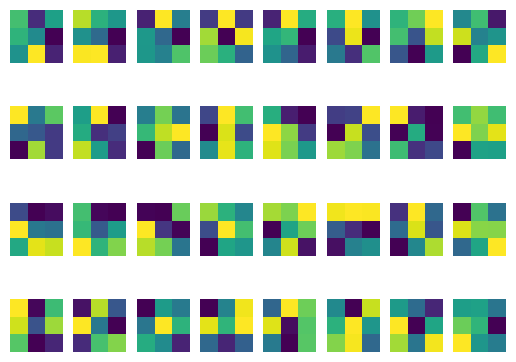

In [ ]:
import numpy as np
# Obtén los pesos de la capa 'conv2d'
weights = model.get_layer('conv2d').get_weights()[0]

# Visualiza los pesos
# Pintamos para las 32 capas de salida
for i in range(weights.shape[3]):
    # Ordenados en 4 filas, 8 columnas (pues son 32)
    plt.subplot(4, 8, i + 1)
    # Todos los kernels de la capa 2 (capa B)
    plt.imshow(weights[:, :, 2, i], cmap='viridis')
    plt.axis('off')

plt.show()

En definitiva, lo que vemos, son todos los filtros (correspondientes a una capa de entrada determinada).

## Añadiendo más capas a la red neuronal

Ahora, continuaremos con algunas capas más para darle una arquitectura más compleja a la red neuronal

In [ ]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Veamos ahora la estructura de la red neuronal

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

En efecto, la capa de `max_pooling2d` no tiene ningún parámetro que aprender y proporciona una salida fruto de reducir a la mitad los ejes horizontales y verticales (None, 15, 15, 32)

Con esto terminaríamos la parte convolucional (la parte encargada de la representación).

Tenemos que añadirle ahora dos capas más:
- `Flatten` que convierte todos los pesos en una ristra unidimensional
- `Dense` (en teoría la hemos llamado `Fully Connected Layer (FC)`)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Hasta este punto, hemos visto cómo crear una arquitectura de red neuronal.
- Además, hemos visto cómo encontrar los pesos y visualizarlos
- Hemos comprendido cómo se relacionan los diferentes parámetros de entrada con los pesos a ajustar posteriormente durante el aprendizaje

## Entrenamiento

Es hora de entrenar el modelo y para ello hay que dar **dos pasos**:
- Definir (`compile`) los parámetros que vamos a utilizar en el aprendizaje (como `optimizer`, `loss` y `metrics`)
  - `optimizer` es el encargado de ejecutar el descenso del gradiente (https://keras.io/api/optimizers/)
  - `loss` es la métrica que usaremos para guiar al descenso del gradiente encontrando el mínimo (https://keras.io/api/losses/)
  - `metrics` es la manera en la que evaluaremos el aprendizaje (`accuracy`, `precision`, `recall`, ...) (https://keras.io/api/metrics/)

In [ ]:
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4,
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 79s 48ms/step - loss: 1.7119 - accuracy: 0.4074 - val_loss: 1.3772 - val_accuracy: 0.5123
Epoch 2/4
1563/1563 [==============================] - 78s 50ms/step - loss: 1.2866 - accuracy: 0.5421 - val_loss: 1.3129 - val_accuracy: 0.5353
Epoch 3/4
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1478 - accuracy: 0.5956 - val_loss: 1.1704 - val_accuracy: 0.5905
Epoch 4/4
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0536 - accuracy: 0.6328 - val_loss: 1.1060 - val_accuracy: 0.6158


Aquí vemos bastante información que pasamos a explicar:
- `Epoch`, es un parámetro (fijado a 4) en el que se repite el proceso de ajuste de los pesos de la red neuronal para encontrar una mejor solución.
- `loss`/`accuracy`, respectivamente valor de la métrica de pérdidas y valor de la métrica de rendimiento. Estos valores se obtienen durante la parte de entrenamiento.
- `val_loss`/`val_accuracy`, valor de las métricas anteriores durante validación/test.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(np.round(100*test_acc,2))

313/313 - 3s - loss: 1.1060 - accuracy: 0.6158 - 3s/epoch - 11ms/step
61.58


¡Genial! Hemos obtenido una tasa de acierto de 66.74% (seguro que si ejecutas esto de nuevo, el número variará).

¿Habrán cambiado los pesos de la capa `conv2d`
?

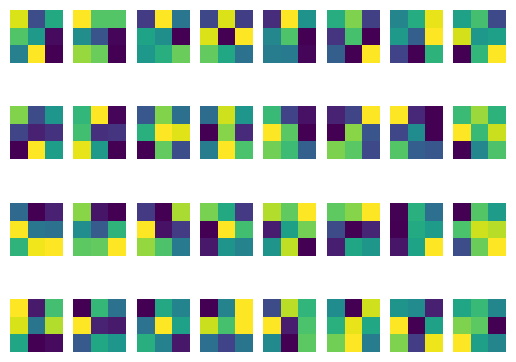

In [ ]:
import numpy as np
# Obtén los pesos de la capa 'conv2d'
weights = model.get_layer('conv2d').get_weights()[0]

# Visualiza los pesos
# Pintamos para las 32 capas de salida
for i in range(weights.shape[3]):
    # Ordenados en 4 filas, 8 columnas (pues son 32)
    plt.subplot(4, 8, i + 1)
    # Todos los kernels de la capa 2 (capa B)
    plt.imshow(weights[:, :, 2, i], cmap='viridis')
    plt.axis('off')

plt.show()

En efecto, han cambiado aunque es curioso ver que no todos los pesos han variado de la misma manera.

## Resumen

Hemos visto en este notebook cómo dar unos primeros pasos con Keras. Con pocas líneas de código hemos conseguido entrenar una red neuronal.

## Curiosidad: ¿Cómo habría sido el código con Tensorflow 1.x?

In [ ]:
import tensorflow as tf

# Definir el grafo
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
conv1 = tf.layers.conv2d(x, 32, (3, 3), activation=tf.nn.relu, padding='valid')
maxpool1 = tf.layers.max_pooling2d(conv1, (2, 2), (2, 2))
conv2 = tf.layers.conv2d(maxpool1, 64, (3, 3), activation=tf.nn.relu, padding='valid')
maxpool2 = tf.layers.max_pooling2d(conv2, (2, 2), (2, 2))
conv3 = tf.layers.conv2d(maxpool2, 64, (3, 3), activation=tf.nn.relu, padding='valid')

# Inicializar una sesión de TensorFlow
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Ejecutar el grafo
output = sess.run(conv3, feed_dict={x: your_input_data})


AttributeError: ignored

# Cargamos un modelo preentrenado (VGG16)

¿Qué es este modelo VGG16 y por qué es tan famoso?

El modelo VGG pertenece al grupo de investigación Oxford Visual Geometry Group (de ahí el nombre, VGG). En 2014 consiguieron ganar una competición (ILSVRC) e hicieron pública su red neuronal.

La red neuronal es más que conocida para nosotros:

![Texto Alternativo](https://production-media.paperswithcode.com/methods/vgg_7mT4DML.png)


Cargamos pues la red neuronal

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
model = VGG16(weights='imagenet',
              include_top=True)

Al igual que el resto de redes neuronales, podemos ver cuál es su arquitectura.

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Al igual que antes, podemos ver cómo son sus pesos intermedios (para una capa determinada)

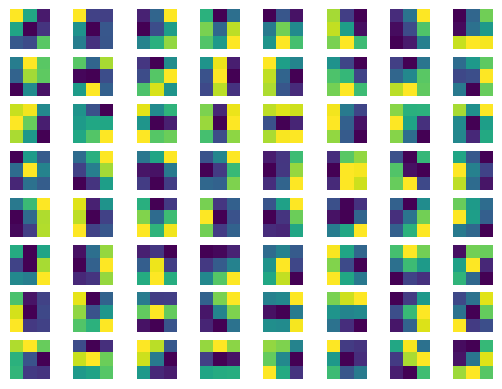

In [ ]:
import numpy as np
# Obtén los pesos de la capa 'conv2d'
weights = model.get_layer('block1_conv2').get_weights()[0]

# Visualiza los pesos
# Pintamos para las 32 capas de salida
for i in range(weights.shape[3]):
    # Ordenados en 8 filas, 8 columnas (pues son 64)
    plt.subplot(8, 8, i + 1)
    # Todos los kernels de la capa 2 (capa B)
    plt.imshow(weights[:, :, 2, i], cmap='viridis')
    plt.axis('off')

plt.show()

## Visualización de Embeddings

Veamos ahora cómo es la representación que otorga esta red neuronal (que ya está entrenada) a una imagen de entrada.

In [ ]:
imagen_entrada = train_images[1867].copy()

Para poder visualizar una capa en concreto, tenemos que crearnos una red neuronal con las capas que deseemos

In [ ]:
from keras.models import Model
model = Model(inputs=model.input,
              outputs=model.get_layer('block1_conv1').output)


Adaptamos la imagen a los parámetros de entrada requeridos por VGG16 (que son imágenes de 224x224)

In [ ]:
import tensorflow as tf
img = tf.image.resize(imagen_entrada, (224, 224))
# El comando expand_dims, crea una dimensión adicional para que
# encaje en la estructura del tensor que tiene 4 dimensiones.
img = np.expand_dims(img, axis=0)


Comprobamos ahora que en efecto, la imagen de entrada tiene dimensiones diferentes a la imagen transformada/reescalada.

Este tipo de `resize` se basan en lo que vimos en los primeros temas.

In [ ]:
(imagen_entrada.shape,
 img.shape)

((32, 32, 3), (1, 224, 224, 3))

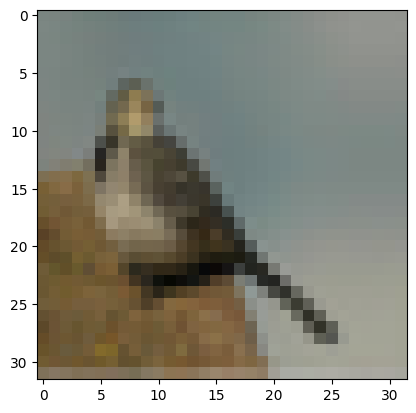

In [ ]:
plt.imshow(imagen_entrada)

Predecimos ahora con el modelo. Al predecir, lo que hacemos es pasar la imagen por todos los pesos de la red neuronal. En el fondo, `predict` no es predecir ni estimar, si no simplemente transformar la imagen original según el criterio que hemos establecido en la red neuronal.

In [ ]:
block1_conv_output = model.predict(img)

1/1 [==============================] - 0s 86ms/step


Representamos ahora los embeddings de dicha capa. Para ello, mostramos por pantalla las diferentes capas (que son 64), con lo cual esperamos 64 imágenes diferentes.

Cada imagen tiene que verse como:
 Imagen original convolucionada por un determinado filtro.

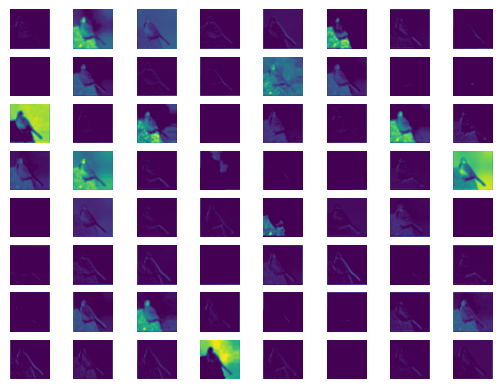

In [ ]:
# Visualiza los pesos
# Pintamos para las 32 capas de salida
for i in range(block1_conv_output.shape[3]):
    # Ordenados en 8 filas, 8 columnas (pues son 64)
    plt.subplot(8, 8, i + 1)
    # Todos los kernels de la capa 2 (capa B)
    plt.imshow(block1_conv_output[0, :, :, i],
               cmap='viridis')
    plt.axis('off')

plt.show()

## Embeddings más profundos

Veamos la salida final de VGG justo antes de que comience la etapa de clasificación.

Para ello, cargamos toda la red menos la última capa. Como esto es muy común en Transfer Learning, ya tenemos una opción disponible en Keras, `include_top=False` que nos carga toda la red menos las capas `Dense`.

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
model_sin_clasificacion = VGG16(weights='imagenet',
              include_top=False, input_shape = (224, 224, 3)
                                )

In [ ]:
salida_sin_clasif = model_sin_clasificacion.predict(img)

1/1 [==============================] - 1s 692ms/step


Veamos las dimensiones de esta imagen y si se corresponde con lo esperado (7x7x512)

In [ ]:
salida_sin_clasif.shape

(1, 7, 7, 512)

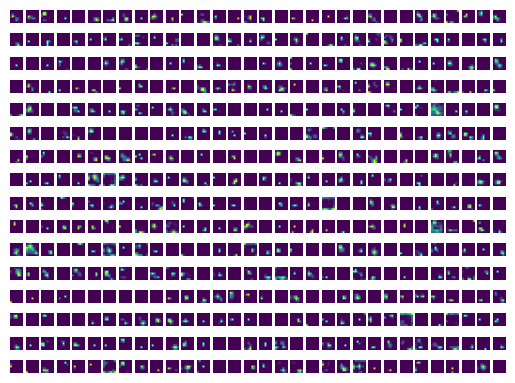

In [ ]:
# Visualiza los pesos
# Pintamos para las 32 capas de salida
for i in range(salida_sin_clasif.shape[3]):
    # Ordenados en 16 filas, 32 columnas (pues son 512)
    plt.subplot(16, 32, i + 1)
    plt.imshow(salida_sin_clasif[0, :, :, i],
    cmap='viridis')
    plt.axis('off')

plt.show()

# Ejercicio:

Sin buscar en ChatGPT: ¿qué arquitectura es esta?

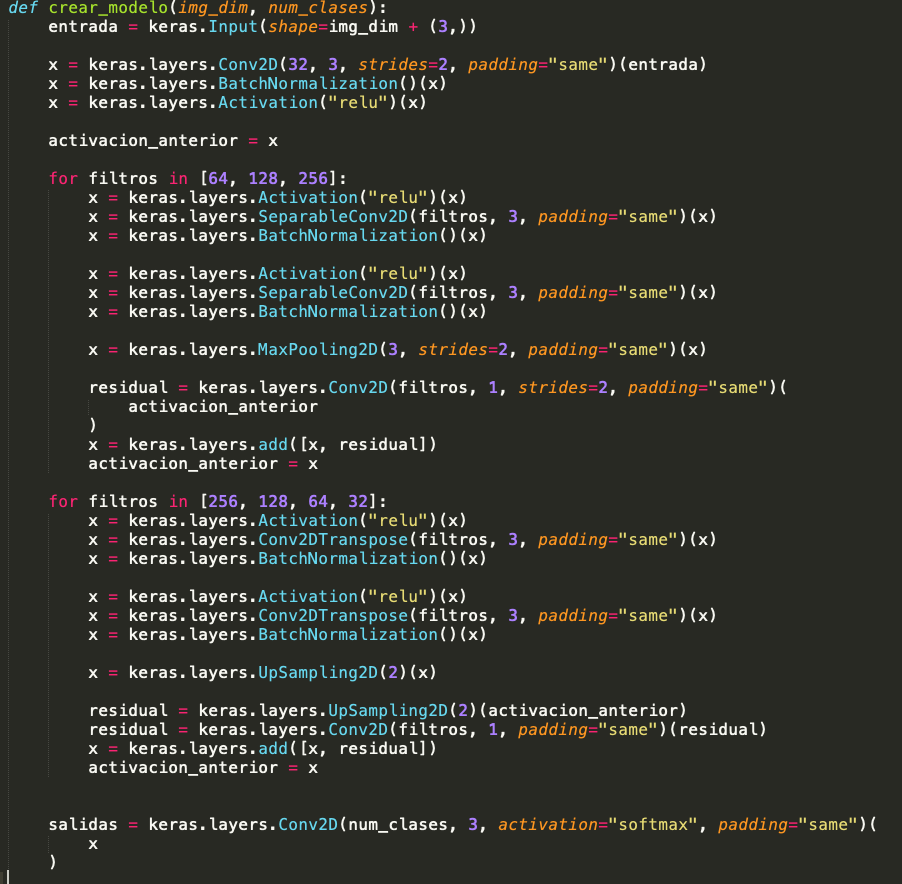